In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import itertools
from __future__ import division
from sklearn.tree import tree, DecisionTreeClassifier, export_graphviz
from sklearn import cluster

%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("max_rows", 500)

In [42]:
filePath = 'datasets/NYPD_Motor_Vehicle_Collisions_weather4.csv'
#filePath = "datasets/weather_count.csv"
colls = pd.read_csv(filePath)

print len(colls.index)

colls = colls[pd.notnull(colls['LOCATION'])]


769054


In [ ]:
colls['LATITUDE'] = colls.LOCATION.str.split('')
colls['LONGITUDE']

In [50]:
X = colls[['LATITUDE','LONGITUDE']].values

In [44]:
 colls[colls.Conditions == 'Light Snow']

Empty DataFrame
Columns: [Unnamed: 0, DATE, TIME, BOROUGH, ZIP CODE, LATITUDE, LONGITUDE, LOCATION, ON STREET NAME, CROSS STREET NAME, OFF STREET NAME, NUMBER OF PERSONS INJURED, NUMBER OF PERSONS KILLED, NUMBER OF PEDESTRIANS INJURED, NUMBER OF PEDESTRIANS KILLED, NUMBER OF CYCLIST INJURED, NUMBER OF CYCLIST KILLED, NUMBER OF MOTORIST INJURED, NUMBER OF MOTORIST KILLED, CONTRIBUTING FACTOR VEHICLE 1, CONTRIBUTING FACTOR VEHICLE 2, CONTRIBUTING FACTOR VEHICLE 3, CONTRIBUTING FACTOR VEHICLE 4, CONTRIBUTING FACTOR VEHICLE 5, UNIQUE KEY, VEHICLE TYPE CODE 1, VEHICLE TYPE CODE 2, VEHICLE TYPE CODE 3, VEHICLE TYPE CODE 4, VEHICLE TYPE CODE 5, Conditions, Precipitationmm, TemperatureC, VisibilityKm]
Index: []

In [38]:
colls['LONGITUDE'] = colls.LOCATION.str.split(',').str.get(0).str.split('(').str.get(1)
colls['LATITUDE'] = colls.LOCATION.str.split(',').str.get(1).str.split('(').str.get(0)


In [45]:
X = colls[colls.Conditions == 'Light Snow'][['LATITUDE','LONGITUDE']].values

In [104]:
eps = 0.0012
core_point_size =  13


##############################################################################
# Compute DBSCAN
db = DBSCAN(eps=eps, min_samples=core_point_size).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 10


In [75]:
def perform_db_scan(X, eps, core_point_size):

    db = DBSCAN(eps=eps, min_samples=core_point_size).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    return n_clusters_

In [83]:
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step

for i in drange(0.0009, 0.009, 0.0001):
    for s in xrange(8, 15, 1):
        print "With eps %f and %d size  we have %d clsuters" % (i, s, perform_db_scan(X, i, s))

With eps 0.000900 and 8 size  we have 61 clsuters
With eps 0.000900 and 9 size  we have 40 clsuters
With eps 0.000900 and 10 size  we have 24 clsuters
With eps 0.000900 and 11 size  we have 17 clsuters
With eps 0.000900 and 12 size  we have 10 clsuters
With eps 0.000900 and 13 size  we have 9 clsuters
With eps 0.000900 and 14 size  we have 7 clsuters
With eps 0.001000 and 8 size  we have 74 clsuters
With eps 0.001000 and 9 size  we have 46 clsuters
With eps 0.001000 and 10 size  we have 30 clsuters
With eps 0.001000 and 11 size  we have 21 clsuters
With eps 0.001000 and 12 size  we have 11 clsuters
With eps 0.001000 and 13 size  we have 9 clsuters
With eps 0.001000 and 14 size  we have 7 clsuters
With eps 0.001100 and 8 size  we have 84 clsuters
With eps 0.001100 and 9 size  we have 52 clsuters
With eps 0.001100 and 10 size  we have 35 clsuters
With eps 0.001100 and 11 size  we have 23 clsuters
With eps 0.001100 and 12 size  we have 11 clsuters
With eps 0.001100 and 13 size  we have 9 

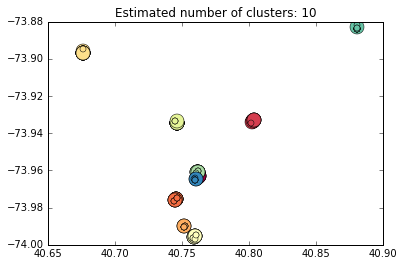

In [105]:




##############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        continue
        ##col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [106]:

df = pd.DataFrame(X, columns=['LATITUDE', 'LONGITUDE'])
df['Cluster'] = db.labels_


inten = df[df.Cluster >= 0].groupby(['Cluster']).agg(['mean', 'count'])


pd.DataFrame({'cluster':inten.index,'intencity':inten['LATITUDE']['count']})


cluster  intencity
Cluster                    
0              0         24
1              1         19
2              2         20
3              3         13
4              4         15
5              5         16
6              6         18
7              7         16
8              8         13
9              9          9

In [108]:
import geoplotlib as gpl

df = pd.DataFrame(X, columns=['LATITUDE', 'LONGITUDE'])
df['Cluster'] = db.labels_

def get_spaced_colors(n):
    max_value = 16581375 #255**3
    interval = int(max_value / n)
    colors = [hex(I)[2:].zfill(6) for I in range(0, max_value, interval)]
    
    return [[int(i[:2], 16), int(i[2:4], 16), int(i[4:], 16), 255] for i in colors]

colormap = get_spaced_colors(n_clusters_)

# noise
#lat,lon = coords(-1)
#latlong = {'lon': lon, 'lat': lat}
#gpl.dot(latlong, color='w')

def coords(k):
    lat = df[df['Cluster'] == k].LATITUDE.values
    lon = df[df['Cluster'] == k].LONGITUDE.values
    
    return lat,lon
    
for i in range(0, n_clusters_):
    lat, lon = coords(i)

    latlong = {'lon': lon, 'lat': lat}
    gpl.dot(latlong, color=colormap[i])
    #gpl.dot(latlong, color='w')

#lat,lon = coords(1)
#latlong = {'lon': lon, 'lat': lat}
#gpl.dot(latlong, color='r')

gpl.inline()

In [57]:
len(colls.LOCATION.unique())

46924